In [21]:
import pandas as pd
import numpy as np
import mysql.connector
import pandas_profiling
import statistics
#from mysql.connector import Error

## 1. Data pull & early analysis of data from gender_age_train

In [34]:
connection = mysql.connector.connect(host='cpanel.insaid.co',
                                         database='Capstone1',
                                         user='student',
                                         password='student')
sql_select_Query = "select * from information_schema.columns where table_name = 'gender_age_train'"
cursor = connection.cursor()
cursor.execute(sql_select_Query)
records = cursor.fetchall()
print("Total number of columns in gender_age_train is: ", cursor.rowcount)
print("\nPrinting column Names of table gender_age_train ")
for row in records:
    print("Table_Name = ", row[2], )
    print("Column Name  = ", row[3], "\n")
    
print('---------------------------------------------------------------------------------------------------------')
sql_select_Query = "select * from gender_age_train"
cursor = connection.cursor()
cursor.execute(sql_select_Query)
records = cursor.fetchall()
print("\n Storing records from gender_age_train to dataframe")

gender_age_train_df = pd.DataFrame(records)


Total number of columns in gender_age_train is:  4

Printing column Names of table gender_age_train 
Table_Name =  gender_age_train
Column Name  =  device_id 

Table_Name =  gender_age_train
Column Name  =  gender 

Table_Name =  gender_age_train
Column Name  =  age 

Table_Name =  gender_age_train
Column Name  =  group 

---------------------------------------------------------------------------------------------------------

 Storing records from gender_age_train to dataframe


In [35]:
gender_age_train_df.head(5)

,0,1,2,3
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [36]:
gender_age_train_df_new = gender_age_train_df.rename(columns={0:'device_id',1:'gender',2:'age',3:'group'})

In [37]:
gender_age_train_df_new.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [38]:
gender_age_train_df_new

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31
...,...,...,...,...
74640,4682031842235089751,M,30,M29-31
74641,-9178703742877135986,M,30,M29-31
74642,180946546684162312,M,20,M22-
74643,1390702386071991851,M,37,M32-38


In [39]:
gender_age_train_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [40]:
gender_age_train_df_new.describe()

,device_id,age
count,7.464500e+04,74645.000000
mean,-7.491354e+14,31.410342
std,5.327150e+18,9.868735
min,-9.223067e+18,1.000000
25%,-4.617367e+18,25.000000
50%,-1.841362e+16,29.000000
75%,4.636656e+18,36.000000
max,9.222849e+18,96.000000


In [41]:
gender_age_train_df_new.describe(include='all')

,device_id,gender,age,group
count,7.464500e+04,74645,74645.000000,74645
unique,NaN,2,NaN,12
top,NaN,M,NaN,M23-26
freq,NaN,47904,NaN,9605
mean,-7.491354e+14,NaN,31.410342,NaN
std,5.327150e+18,NaN,9.868735,NaN
min,-9.223067e+18,NaN,1.000000,NaN
25%,-4.617367e+18,NaN,25.000000,NaN
50%,-1.841362e+16,NaN,29.000000,NaN
75%,4.636656e+18,NaN,36.000000,NaN


In [42]:
AgeModevalue = statistics.mode(gender_age_train_df_new['age'])
AgeModevalue

26

In [9]:
gender_age_train_df_new['device_id'].nunique()

74645

In [10]:
gender_age_train_df_new['group'].unique() 

array(['M32-38', 'M29-31', 'F24-26', 'F33-42', 'F27-28', 'M39+', 'M23-26',
       'M27-28', 'M22-', 'F43+', 'F23-', 'F29-32'], dtype=object)

In [11]:
gender_age_train_df_new['group'].nunique() 

12

In [12]:
gender_age_train_df_new.groupby('group')['device_id'].nunique()

group
F23-      5050
F24-26    4190
F27-28    3118
F29-32    4628
F33-42    5561
F43+      4194
M22-      7488
M23-26    9605
M27-28    5445
M29-31    7309
M32-38    9476
M39+      8581
Name: device_id, dtype: int64

In [13]:
gender_age_train_df_new.isnull().any()

device_id    False
gender       False
age          False
group        False
dtype: bool

In [14]:
# df.loc[df['column_name'] == some_value]
gender_age_train_df_new.loc[gender_age_train_df_new['gender'] == 'M']

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31
...,...,...,...,...
74640,4682031842235089751,M,30,M29-31
74641,-9178703742877135986,M,30,M29-31
74642,180946546684162312,M,20,M22-
74643,1390702386071991851,M,37,M32-38


In [15]:
gender_age_train_df_new.loc[gender_age_train_df_new['gender'] == 'F']

,device_id,gender,age,group
5,-1297074871525174196,F,24,F24-26
9,1596610250680140042,F,36,F33-42
11,7477216237379271436,F,37,F33-42
12,2478205222798310601,F,28,F27-28
15,1508636020748379883,F,28,F27-28
...,...,...,...,...
74626,8012242415081116163,F,30,F29-32
74627,-7513478293429751074,F,56,F43+
74630,-2510601842775405069,F,22,F23-
74631,-2572857383593438598,F,21,F23-


In [41]:
import pandas_profiling

In [17]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

#profile = gender_age_train_df_new.profile_report(title="GenderAge Profiling before Data Preprocessing")
#profile.to_file(output_file="GenderAge_profiling_before_preprocessing.html")

## 2. Data pull & early analysis of data from phone_brand_device_model

In [13]:
connection = mysql.connector.connect(host='cpanel.insaid.co',
                                         database='Capstone1',
                                         user='student',
                                         password='student')
sql_select_Query = "select * from information_schema.columns where table_name = 'phone_brand_device_model'"
cursor = connection.cursor()
cursor.execute(sql_select_Query)
records = cursor.fetchall()
print("Total number of columns in phone_brand_device_model is: ", cursor.rowcount)
print("\nPrinting column Names of table phone_brand_device_model ")
for row in records:
    print("Table_Name = ", row[2], )
    print("Column Name  = ", row[3], "\n")
    
print('---------------------------------------------------------------------------------------------------------')
sql_select_Query = "select * from phone_brand_device_model"
cursor = connection.cursor()
cursor.execute(sql_select_Query)
records = cursor.fetchall()
print("\n Storing records from phone_brand_device_model to dataframe")

phone_brand_device_model_df = pd.DataFrame(records)


Total number of columns in phone_brand_device_model is:  3

Printing column Names of table phone_brand_device_model 
Table_Name =  phone_brand_device_model
Column Name  =  device_id 

Table_Name =  phone_brand_device_model
Column Name  =  phone_brand 

Table_Name =  phone_brand_device_model
Column Name  =  device_model 

---------------------------------------------------------------------------------------------------------

 Storing records from phone_brand_device_model to dataframe


In [14]:
phone_brand_device_model_df.head()

,0,1,2
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [15]:
phone_brand_device_model_df_new = phone_brand_device_model_df.rename(columns={0:'device_id',1:'phone_brand',2:'device_model'})

In [16]:
phone_brand_device_model_df_new.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [17]:
phone_brand_device_model_df_new

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2
...,...,...,...
87721,-4961458925928574032,华为,荣耀畅玩4X
87722,-8819817317449262375,华为,荣耀6
87723,-3358291377416935026,华为,荣耀畅玩4
87724,3282788959750981633,小米,MI 2


In [18]:
phone_brand_device_model_df_new.describe()

,device_id
count,8.772600e+04
mean,-5.212557e+15
std,5.330157e+18
min,-9.223322e+18
25%,-4.623331e+18
50%,-3.109802e+16
75%,4.635194e+18
max,9.222849e+18


In [19]:
phone_brand_device_model_df_new.describe(include='all')

,device_id,phone_brand,device_model
count,8.772600e+04,87726,87726
unique,NaN,116,1467
top,NaN,小米,红米note
freq,NaN,21645,3500
mean,-5.212557e+15,NaN,NaN
std,5.330157e+18,NaN,NaN
min,-9.223322e+18,NaN,NaN
25%,-4.623331e+18,NaN,NaN
50%,-3.109802e+16,NaN,NaN
75%,4.635194e+18,NaN,NaN


In [22]:
PhoneBrandModevalue = statistics.mode(phone_brand_device_model_df_new['phone_brand'])
PhoneBrandModevalue

'小米'

In [23]:
DeviceModelModevalue = statistics.mode(phone_brand_device_model_df_new['device_model'])
DeviceModelModevalue

'红米note'

In [24]:
phone_brand_device_model_df_new['phone_brand'].replace('小米','Xiaomi',inplace=True)

In [25]:
# the top now replaces '小米' with 'Xiaomi' now
phone_brand_device_model_df_new.describe(include='all')

,device_id,phone_brand,device_model
count,8.772600e+04,87726,87726
unique,NaN,116,1467
top,NaN,Xiaomi,红米note
freq,NaN,21645,3500
mean,-5.212557e+15,NaN,NaN
std,5.330157e+18,NaN,NaN
min,-9.223322e+18,NaN,NaN
25%,-4.623331e+18,NaN,NaN
50%,-3.109802e+16,NaN,NaN
75%,4.635194e+18,NaN,NaN


In [26]:
phone_brand_device_model_df_new['phone_brand'].replace('华为','Huawei',inplace=True)

In [27]:
phone_brand_device_model_df_new['phone_brand'].replace('三星','Samsung',inplace=True)

In [28]:
phone_brand_device_model_df_new['phone_brand'].replace('魅族','Meizu',inplace=True)

In [29]:
phone_brand_device_model_df_new['phone_brand'].replace('酷派','Coolpad',inplace=True)

In [30]:
phone_brand_device_model_df_new['phone_brand'].replace('乐视','LeEco',inplace=True)

In [31]:
phone_brand_device_model_df_new['phone_brand'].replace('联想','Lenovo',inplace=True)

In [21]:
phone_brand_device_model_df_new['device_id'].nunique()

87726

In [22]:
phone_brand_device_model_df_new['phone_brand'].unique() 

array(['vivo', '小米', 'OPPO', '三星', '酷派', '联想 ', '华为', '奇酷', '魅族', '斐讯',
       '中国移动', 'HTC', '天语', '至尊宝', 'LG', '欧博信', '优米', 'ZUK', '努比亚', '惠普',
       '尼比鲁', '美图', '乡米', '摩托罗拉', '梦米', '锤子', '富可视', '乐视', '海信', '百立丰',
       '一加', '语信', '海尔', '酷比', '纽曼', '波导', '朵唯', '聆韵', 'TCL', '酷珀', '爱派尔',
       'LOGO', '青葱', '果米', '华硕', '昂达', '艾优尼', '康佳', '优购', '邦华', '赛博宇华',
       '黑米', 'Lovme', '先锋', 'E派', '神舟', '诺基亚', '普耐尔', '糖葫芦', '亿通', '欧新',
       '米奇', '酷比魔方', '蓝魔', '小杨树', '贝尔丰', '糯米', '米歌', 'E人E本', '西米', '大Q',
       '台电', '飞利浦', '唯米', '大显', '长虹', '维图', '青橙', '本为', '虾米', '夏新', '帷幄',
       '百加', 'SUGAR', '欧奇', '世纪星', '智镁', '欧比', '基伍', '飞秒', '德赛', '易派',
       '谷歌', '金星数码', '广信', '诺亚信', 'MIL', '白米', '大可乐', '宝捷讯', '优语', '首云',
       '瑞米', '瑞高', '沃普丰', '摩乐', '鲜米', '凯利通', '唯比', '欧沃', '丰米', '恒宇丰',
       '奥克斯', '西门子', '欧乐迪', 'PPTV'], dtype=object)

In [23]:
phone_brand_device_model_df_new['phone_brand'].nunique() 

116

In [24]:
phone_brand_device_model_df_new.groupby('phone_brand')['device_id'].nunique()

phone_brand
E人E本       1
E派        13
HTC     1272
LG       360
LOGO      28
        ... 
飞秒         2
首云         2
魅族      5531
鲜米         2
黑米        47
Name: device_id, Length: 116, dtype: int64

In [33]:
phone_brand_device_model_df_new.groupby('phone_brand')['device_id'].nunique().sort_values(ascending=False).reset_index(name='count').head(10)

,phone_brand,count
0,Xiaomi,21645
1,Samsung,19211
2,Huawei,15181
3,vivo,7596
4,OPPO,6717
5,Meizu,5531
6,Coolpad,3979
7,HTC,1272
8,联想,982
9,LeEco,841


In [25]:
phone_brand_device_model_df_new.isnull().any()

device_id       False
phone_brand     False
device_model    False
dtype: bool

In [26]:
phone_brand_device_model_df_new['device_model'].nunique() 

1467

In [29]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

#profile = phone_brand_device_model_df_new.profile_report(title="PhoneBrand_DeviceModel Profiling before Data Preprocessing")
#profile.to_file(output_file="PhoneBrandDeviceModel_profiling_before_preprocessing.html")

## 3. Data pull & early analysis of data from events_data

In [1]:
import pandas as pd

In [2]:
df_events = pd.read_csv('events_data.csv')

In [3]:
df_events

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand
...,...,...,...,...,...,...,...
3252945,2687452,-1.937028e+18,2016-05-07 23:33:14,73.891597,18.544124,Pune,Maharashtra
3252946,1051580,3.345851e+18,2016-05-03 05:13:30,72.837258,19.018432,Mumbai,Maharashtra
3252947,1316227,-6.406040e+18,2016-05-01 16:03:28,77.235578,28.764065,Delhi,Delhi
3252948,381262,-2.920741e+18,2016-05-05 17:22:36,83.326044,17.765488,Visakhapatnam,AndhraPradesh


In [4]:
df_events.shape

(3252950, 7)

In [5]:
df_events.isnull().sum()

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

In [6]:
df_events.describe(include = 'all')

,event_id,device_id,timestamp,longitude,latitude,city,state
count,3.252950e+06,3.252497e+06,3252950,3.252527e+06,3.252527e+06,3252950,3252573
unique,NaN,NaN,588126,NaN,NaN,933,32
top,NaN,NaN,2016-05-03 10:00:03,NaN,NaN,Delhi,Delhi
freq,NaN,NaN,43,NaN,NaN,744276,751733
mean,1.626476e+06,1.012200e+17,NaN,7.815868e+01,2.168851e+01,NaN,NaN
std,9.390459e+05,5.316758e+18,NaN,4.235570e+00,5.789111e+00,NaN,NaN
min,1.000000e+00,-9.222957e+18,NaN,1.256700e+01,8.190110e+00,NaN,NaN
25%,8.132382e+05,-4.540611e+18,NaN,7.583543e+01,1.780171e+01,NaN,NaN
50%,1.626476e+06,1.726820e+17,NaN,7.726814e+01,2.216454e+01,NaN,NaN
75%,2.439713e+06,4.861813e+18,NaN,8.031916e+01,2.868278e+01,NaN,NaN


In [7]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
event_id     int64
device_id    float64
timestamp    object
longitude    float64
latitude     float64
city         object
state        object
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


In [8]:
df_events.head(7)

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand
5,1078723,-5.124242e+17,2016-05-02 02:21:20,83.398244,17.768149,Visakhapatnam,AndhraPradesh
6,2948755,5.536513e+18,2016-05-03 16:20:14,80.359796,13.128174,Chennai,TamilNadu


In [76]:
df_events.loc[df_events['event_id'] == 2948755]['device_id']

6    5.536513e+18
Name: device_id, dtype: float64

In [13]:
df_events.groupby('device_id')['event_id'].nunique()

device_id
-9.222957e+18    65
-9.222755e+18     1
-9.222173e+18    20
-9.221640e+18    34
-9.221087e+18     2
                 ..
 9.220161e+18     6
 9.220807e+18    27
 9.220915e+18    44
 9.221843e+18    17
 9.222849e+18     2
Name: event_id, Length: 60865, dtype: int64

In [64]:
df_events.groupby('device_id')['event_id'].nunique().sort_values(ascending=False).reset_index(name='count').head(5000)

,device_id,count
0,5.536513e+18,33426
1,-4.792366e+18,14568
2,4.428421e+17,6731
3,-6.242501e+18,4150
4,-8.340098e+18,3973
...,...,...
4995,-6.288331e+18,152
4996,7.448160e+18,152
4997,-4.970322e+17,152
4998,-5.003884e+17,152


In [48]:
df_events['Date'] = pd.to_datetime(df_events['timestamp']).dt.date
df_events['Time'] = pd.to_datetime(df_events['timestamp']).dt.time

In [60]:
df_events['Year'] = pd.DatetimeIndex(df_events['Date']).year
df_events['Month'] = pd.DatetimeIndex(df_events['Date']).month
df_events['Day'] = pd.DatetimeIndex(df_events['Date']).day

In [9]:
df_events.head(10)

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand
5,1078723,-5.124242e+17,2016-05-02 02:21:20,83.398244,17.768149,Visakhapatnam,AndhraPradesh
6,2948755,5.536513e+18,2016-05-03 16:20:14,80.359796,13.128174,Chennai,TamilNadu
7,280014,-8.879644e+18,2016-05-05 13:06:01,78.155397,16.390327,Wanparti,AndhraPradesh
8,2309828,3.020769e+18,2016-05-04 09:24:50,77.263922,28.757914,Delhi,Delhi
9,720049,4.928556e+18,2016-05-06 19:00:52,72.844795,18.974929,Mumbai,Maharashtra


In [53]:
df_events['Year'].nunique() 

1

In [58]:
df_events['Month'].nunique()

2

In [59]:
df_events.groupby('Month')['event_id'].nunique()

Month
4        959
5    3251991
Name: event_id, dtype: int64

In [63]:
df_events.groupby('Day')['event_id'].nunique().sort_values(ascending=False).reset_index(name='count')

,Day,count
0,3,483293
1,5,478998
2,4,473487
3,6,471730
4,2,451547
5,7,448346
6,1,444588
7,30,959
8,8,2


In [9]:
pip install shapely

     |████████████████████████████████| 1.6MB 1.1MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install geopandas

     |████████████████████████████████| 962kB 683kB/s eta 0:00:01
     |████████████████████████████████| 13.9MB 340kB/s eta 0:00:01    |▋                               | 245kB 1.5MB/s eta 0:00:10
     |████████████████████████████████| 13.0MB 315kB/s eta 0:00:01    |███████████▋                    | 4.7MB 570kB/s eta 0:00:15     |████████████████████▏           | 8.2MB 1.5MB/s eta 0:00:04
Note: you may need to restart the kernel to use updated packages.


In [12]:
# importing libraries
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd # To create GeodataFrame

import matplotlib.pyplot as plt
%matplotlib inline


In [24]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(df_events['longitude'], df_events['latitude'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(df_events, crs=crs, geometry=geometry)

/Users/srinivasracherla/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [25]:
gdf.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,geometry
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,POINT (77.22568 28.73014)
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,POINT (88.38836 22.66033)
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,POINT (77.25681 28.75791)
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,POINT (80.34361 13.15333)
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,POINT (85.99774 23.84261)


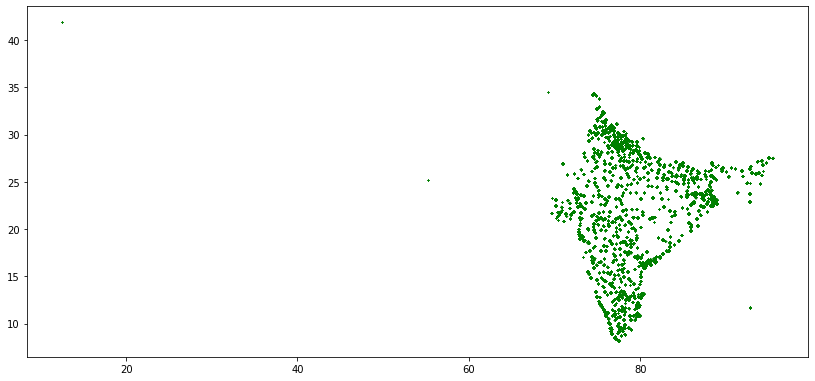

In [26]:
# Plot all points
gdf.plot(marker='*', markersize=0.2, figsize = (14,7), color = 'green')

In [17]:
# States to focus for Consulting
# TamilNadu, Manipur, Chandigarh, Tripura, UttarPradesh, ArunachalPradesh
df_sixstates = df_events.loc[df_events['state'].isin(['TamilNadu','Manipur','Chandigarh','Tripura','UttarPradesh','ArunachalPradesh'])]

In [18]:
df_sixstates

,event_id,device_id,timestamp,longitude,latitude,city,state,geometry
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,POINT (80.34361 13.15333)
6,2948755,5.536513e+18,2016-05-03 16:20:14,80.359796,13.128174,Chennai,TamilNadu,POINT (80.35980 13.12817)
10,3219828,-3.433061e+18,2016-05-03 00:27:21,80.290779,13.115427,Chennai,TamilNadu,POINT (80.29078 13.11543)
14,460645,7.983871e+18,2016-05-04 21:04:40,80.335435,13.189053,Chennai,TamilNadu,POINT (80.33543 13.18905)
15,998037,7.594216e+18,2016-05-03 20:59:09,80.306871,13.172970,Chennai,TamilNadu,POINT (80.30687 13.17297)
...,...,...,...,...,...,...,...,...
3252919,2908565,-8.878550e+17,2016-05-04 12:24:39,80.344270,13.167237,Chennai,TamilNadu,POINT (80.34427 13.16724)
3252931,2406687,-4.516403e+18,2016-05-01 03:15:20,80.345227,13.180708,Chennai,TamilNadu,POINT (80.34523 13.18071)
3252932,1906121,5.536513e+18,2016-05-06 16:32:43,80.359796,13.128174,Chennai,TamilNadu,POINT (80.35980 13.12817)
3252934,1103441,-5.312678e+18,2016-05-03 22:07:23,79.569352,28.811260,Baheri,UttarPradesh,POINT (79.56935 28.81126)


In [27]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(df_sixstates['longitude'], df_sixstates['latitude'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(df_sixstates, crs=crs, geometry=geometry)

/Users/srinivasracherla/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


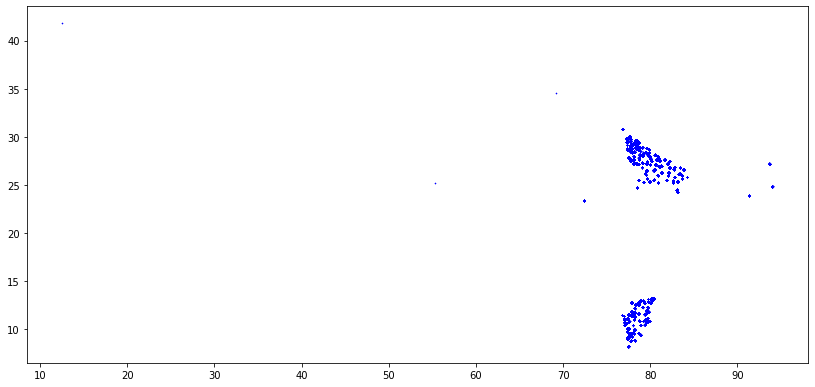

In [28]:
# Plot all points
gdf.plot(marker='*', markersize=0.2, figsize = (14,7), color = 'blue')

In [13]:
df_sixstates.groupby('state')['event_id'].nunique()

state
ArunachalPradesh       608
Chandigarh             894
Manipur                989
TamilNadu           436282
Tripura                892
UttarPradesh         94750
Name: event_id, dtype: int64

In [14]:
df_sixstates.isnull().any()

event_id     False
device_id     True
timestamp    False
longitude     True
latitude      True
city         False
state        False
dtype: bool

In [15]:
df_sixstates.isnull().sum()

event_id      0
device_id    63
timestamp     0
longitude    63
latitude     63
city          0
state         0
dtype: int64

In [33]:
df_sixstates['device_id'].nunique()

9563

In [34]:
df_sixstates['event_id'].nunique()

534415

In [35]:
df_sixstates['city'].nunique()

202

In [36]:
df_sixstates['state'].nunique()

6

In [37]:
df_sixstates['timestamp'].nunique()

345583

In [38]:
df_sixstates['longitude'].nunique()

9509

In [39]:
df_sixstates['latitude'].nunique()

9504

In [17]:
df_events.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand


In [18]:
df_events.shape

(3252950, 7)

In [43]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

#profile = df_sixstates.profile_report(title="EventsData Profiling before Data Preprocessing")
#profile.to_file(output_file="EventsData_profiling_before_preprocessing.html")

In [11]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

#profile = df_events.profile_report(title="EventsData Profiling before Data Preprocessing")
#profile.to_file(output_file="EventsData_profiling_before_preprocessing.html")

## 4. Merging data from gender_age_train AND phone_brand_device_model

In [44]:
df_merged2tables = pd.merge(gender_age_train_df_new, phone_brand_device_model_df_new, how = 'left', on = 'device_id')

In [45]:
# gender_age_train_df_new.merge(phone_brand_device_model_df_new,on='device_id',how='left')


In [46]:
# gender_age_train_df_new.merge(phone_brand_device_model_df_new,on='device_id',how='left').isnull().any()

In [47]:
df_merged2tables

,device_id,gender,age,group,phone_brand,device_model
0,-8076087639492063270,M,35,M32-38,小米,MI 2
1,-2897161552818060146,M,35,M32-38,小米,MI 2
2,-8260683887967679142,M,35,M32-38,小米,MI 2
3,-4938849341048082022,M,30,M29-31,三星,Galaxy S4
4,245133531816851882,M,30,M29-31,SUGAR,时尚手机
...,...,...,...,...,...,...
74640,4682031842235089751,M,30,M29-31,联想,Q802T
74641,-9178703742877135986,M,30,M29-31,小米,MI 2S
74642,180946546684162312,M,20,M22-,小米,红米note
74643,1390702386071991851,M,37,M32-38,华为,Ascend P8


In [48]:
df_merged2tables.isnull().any()

device_id       False
gender          False
age             False
group           False
phone_brand      True
device_model     True
dtype: bool

## 5. Merging data from gender_age_train, phone_brand_device_model AND events_data

In [49]:
df_merged3tables = pd.merge(df_merged2tables, df_sixstates, how = 'outer', on = 'device_id')

In [50]:
df_merged3tables

,device_id,gender,age,group,phone_brand,device_model,event_id,timestamp,longitude,latitude,city,state
0,-8.076088e+18,M,35.0,M32-38,小米,MI 2,NaN,NaN,NaN,NaN,NaN,NaN
1,-2.897162e+18,M,35.0,M32-38,小米,MI 2,NaN,NaN,NaN,NaN,NaN,NaN
2,-8.260684e+18,M,35.0,M32-38,小米,MI 2,NaN,NaN,NaN,NaN,NaN,NaN
3,-4.938849e+18,M,30.0,M29-31,三星,Galaxy S4,NaN,NaN,NaN,NaN,NaN,NaN
4,2.451335e+17,M,30.0,M29-31,SUGAR,时尚手机,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
608985,-8.997838e+18,NaN,NaN,NaN,NaN,NaN,2854562.0,2016-05-07 12:26:43,80.367161,13.178641,Chennai,TamilNadu
608986,5.807163e+18,NaN,NaN,NaN,NaN,NaN,1656210.0,2016-05-04 02:51:48,80.329626,13.184135,Chennai,TamilNadu
608987,8.250330e+17,NaN,NaN,NaN,NaN,NaN,1155734.0,2016-05-02 18:55:11,77.979264,11.425789,Tiruchengode,TamilNadu
608988,-2.473949e+18,NaN,NaN,NaN,NaN,NaN,2376126.0,2016-05-01 20:43:00,80.297840,13.107062,Chennai,TamilNadu


In [51]:
df_merged3tables = pd.merge(df_sixstates, df_merged2tables, how='outer')

In [52]:
df_merged3tables

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model
0,448114.0,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,NaN,NaN,NaN,NaN,NaN
1,2330011.0,5.731369e+18,2016-05-05 12:44:32,80.343613,13.153332,Chennai,TamilNadu,NaN,NaN,NaN,NaN,NaN
2,1895687.0,5.731369e+18,2016-05-02 12:45:05,80.343613,13.153332,Chennai,TamilNadu,NaN,NaN,NaN,NaN,NaN
3,619715.0,5.731369e+18,2016-05-02 03:37:12,80.343613,13.153332,Chennai,TamilNadu,NaN,NaN,NaN,NaN,NaN
4,936200.0,5.731369e+18,2016-05-04 19:18:59,80.343613,13.153332,Chennai,TamilNadu,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
608985,NaN,4.682032e+18,NaN,NaN,NaN,NaN,NaN,M,30.0,M29-31,联想,Q802T
608986,NaN,-9.178704e+18,NaN,NaN,NaN,NaN,NaN,M,30.0,M29-31,小米,MI 2S
608987,NaN,1.809465e+17,NaN,NaN,NaN,NaN,NaN,M,20.0,M22-,小米,红米note
608988,NaN,1.390702e+18,NaN,NaN,NaN,NaN,NaN,M,37.0,M32-38,华为,Ascend P8
